In [331]:
#设置jupyter显示多行结果
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'
import pandas as pd
import numpy as npy
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [332]:
## read data
data = pd.read_csv(r'exams.csv',header=0)
# print(data)

In [333]:
## 查看哪几列有缺省值
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     1
reading score                  1
writing score                  1
dtype: int64

In [334]:
## 填补缺省值 使用均值来填充 四舍五入取整
data['math score'].fillna(round(data['math score'].mean()),inplace = True)
data['reading score'].fillna(round(data['reading score'].mean()),inplace = True)
data['writing score'].fillna(round(data['writing score'].mean()),inplace = True)
## 查看填充后对应行数据
print(data.loc[[6,66,72]])

    gender race/ethnicity parental level of education     lunch  \
6   female        group A           bachelor's degree  standard   
66    male        group C                 high school  standard   
72  female        group B                some college  standard   

   test preparation course  math score  reading score  writing score  
6                     none        62.0           59.0           68.0  
66                    none        66.0           60.0           56.0  
72                    none        49.0           69.0           63.0  


In [335]:
## 插入math score log 列
data['math score log'] = data['math score'].apply(npy.log)
print(data['math score log'])

0      4.204693
1      3.688879
2      4.077537
3      4.343805
4      4.356709
         ...   
995    4.290459
996    4.442651
997    3.465736
998    4.290459
999    4.174387
Name: math score log, Length: 1000, dtype: float64


In [336]:
# 筛选所有group A的学生，计算math score的均值
print("group A  ",data.groupby('race/ethnicity').get_group("group A")['math score'].aggregate(npy.mean))


group A   65.21518987341773


In [337]:
# reading score大于60的学生有多少个，占所有学生的比例是多少  
studentNum = data['reading score'][data['reading score'] > 60].count()
studentTotalNum = data['reading score'].count()
passPercent = studentNum / studentTotalNum
print("reading score > 60 学生数:",studentNum,"\t占比:",passPercent)

reading score > 60 学生数: 729 	占比: 0.729


In [338]:
# 为该数据增添新的一列，命名为‘总成绩’，为数学分数、阅读分数以及写作分数的和。
data['total score'] = data.iloc[:,5:8].sum(axis = 1)
print(data['total score'])

0      197.0
1      154.0
2      169.0
3      223.0
4      219.0
       ...  
995    208.0
996    268.0
997    108.0
998    229.0
999    187.0
Name: total score, Length: 1000, dtype: float64


In [339]:
#为该数据增添新的一列，命名为‘等级’，计算所有学生的‘总成绩’均值，若一学生‘总成绩’大于该均值，‘等级’取值为“high”；否则为“low”
totalScoreMean = data['total score'].sum() / 1000;
data['grade'] = data['total score'].apply(lambda x:"high" if x > totalScoreMean else "low")
print(data['grade'])


0       low
1       low
2       low
3      high
4      high
       ... 
995    high
996    high
997     low
998    high
999     low
Name: grade, Length: 1000, dtype: object


[None]

<Axes: ylabel='race/ethnicity'>

Text(0.5, 1.0, 'Number of different races')

Text(0.5, 0, 'Number')

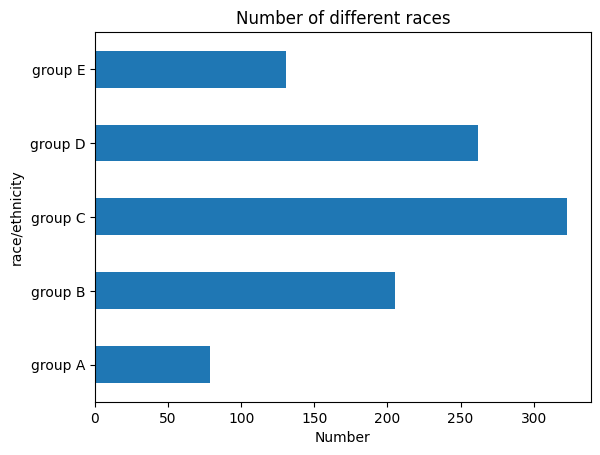

In [340]:
# 不同种族数量的柱状图
raceData = data['race/ethnicity'].value_counts().sort_index()
fig = plt.figure()
fig.set(alpha=0.5)
raceData.plot(kind='barh')
plt.title(u"Number of different races") # puts a title on our graph
plt.xlabel(u"Number")


(array([[0.002, 0.009, 0.029, 0.07 , 0.155, 0.209, 0.182, 0.183, 0.114,
         0.047],
        [0.   , 0.005, 0.026, 0.05 , 0.115, 0.214, 0.202, 0.189, 0.141,
         0.058],
        [0.   , 0.009, 0.027, 0.071, 0.123, 0.213, 0.204, 0.165, 0.124,
         0.064]]),
 array([ 13. ,  21.7,  30.4,  39.1,  47.8,  56.5,  65.2,  73.9,  82.6,
         91.3, 100. ]),
 <a list of 3 BarContainer objects>)

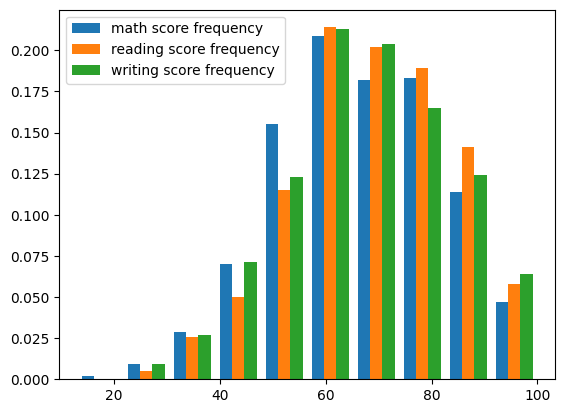

In [341]:
# 各种考试分数频率分布直方图
#
a = data['math score']
b = data['reading score']
c = data['writing score']
singleWeight = npy.zeros_like(a) + 1 / len(a)
plt.hist([a, b,c], weights = [singleWeight,singleWeight,singleWeight],label=['math score frequency', 'reading score frequency','writing score frequency'])
plt.legend(loc='upper left')
plt.show()


<Axes: xlabel='reading score', ylabel='math score'>

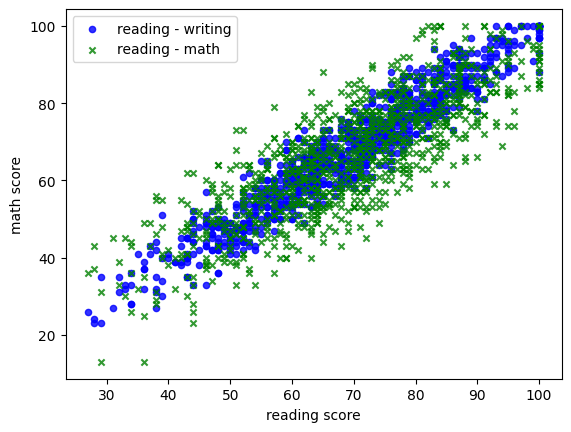

In [342]:
# 两种考试分数之间的散点图
ax = data.plot.scatter(x='reading score', y='writing score', color='b', label='reading - writing',alpha = 0.8)
data.plot.scatter(x='reading score', y='math score', color='g', label='reading - math',ax=ax,marker='x',alpha=0.8)

Text(0.5, 0.92, 'reading-writing-math score')

Text(0.5, 0, 'reading score')

Text(0.5, 0.5, 'writing score')

Text(0.5, 0, 'math score')

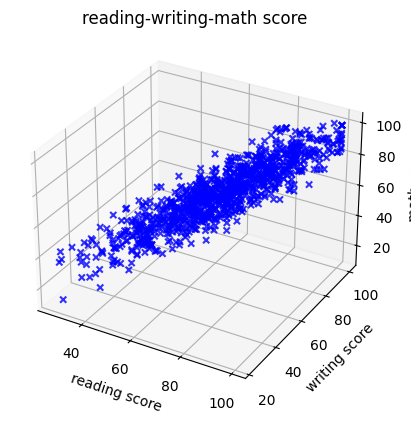

In [343]:
# 三维散点图
ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
ax.set_title('reading-writing-math score')  # 设置本图名称
ax.scatter(data['reading score'],data['writing score'],data['math score'], c = 'b',marker='x',alpha=0.8)   # 绘制数据点 c: 'r'红色，'y'黄色，等颜色
 
ax.set_xlabel('reading score')  # 设置x坐标轴
ax.set_ylabel('writing score')  # 设置y坐标轴
ax.set_zlabel('math score')  # 设置z坐标轴
 
plt.show()

test preparation course
completed    335
none         665
Name: count, dtype: int64

array([<Axes: title={'center': 'math score'}, xlabel='test preparation course'>,
       <Axes: title={'center': 'reading score'}, xlabel='test preparation course'>,
       <Axes: title={'center': 'writing score'}, xlabel='test preparation course'>],
      dtype=object)

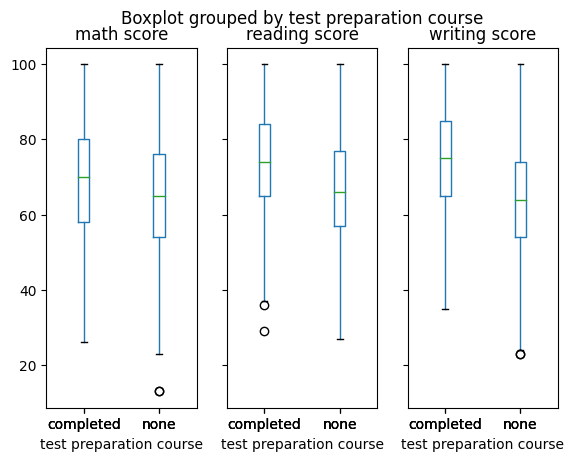

In [344]:
# 不同考试准备课程完成情况对应考试分数的箱线图
data['test preparation course'].value_counts().sort_index()
data.boxplot(column = ["math score","reading score","writing score"],by = 'test preparation course',layout=(1,3),grid=False, fontsize=10)